In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import quantstats as qs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
import yfinance as yf
from scipy import stats

How many comapanies do you want to analyze?:1
Start date of stock market: 2012-07-01
Company #1 symbol:AAPL
Start date of analysis (yyyy-mm-dd):2012-07-01


                    Strategy
------------------  ----------
Start Period        2012-07-02
End Period          2023-05-10
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   877.7%
CAGR﹪              23.36%

Sharpe              0.87
Prob. Sharpe Ratio  99.79%
Sortino             1.27
Sortino/√2          0.9
Omega               1.17

Max Drawdown        -43.8%
Longest DD Days     662

Gain/Pain Ratio     0.17
Gain/Pain (1M)      0.89

Payoff Ratio        1.06
Profit Factor       1.17
Common Sense Ratio  1.23
CPC Index           0.65
Tail Ratio          1.05
Outlier Win Ratio   3.73
Outlier Loss Ratio  3.93

MTD                 2.29%
3M                  15.22%
6M                  28.88%
YTD                 33.78%
1Y                  14.66%
3Y (ann.)           27.98%
5Y (ann.)           31.1%
10Y (ann.)          28.44%
All-time (ann.)     23.36%

Avg. Drawdown       -4.42%
Avg. Drawdown Days  36
Recovery Factor     20.04
Ulcer Index         0.16
Serenity Index      3.

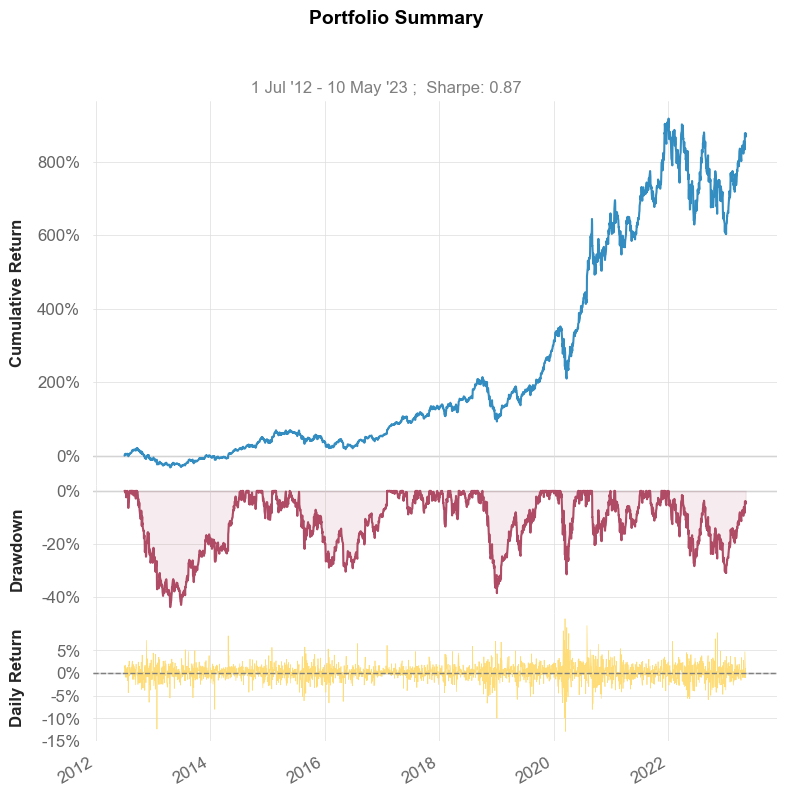

/Users/pedrio/anaconda3/lib/python3.10/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


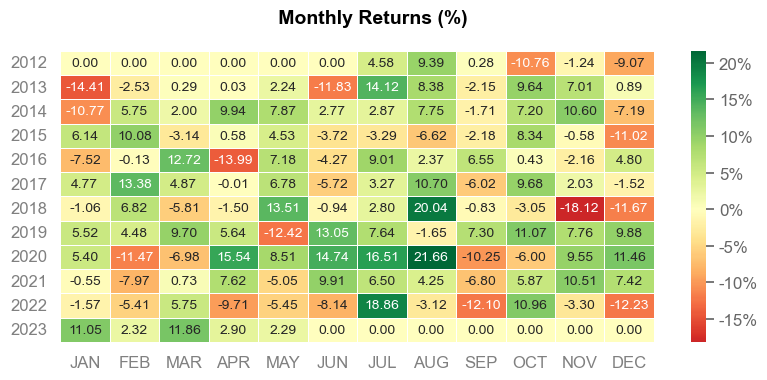

In [3]:
list=[]
n=int(input("How many comapanies do you want to analyze?:"))
print("Start date of stock market: 2012-07-01")
for i in range(n):
    x = input("Company #"+str(i+1)+' symbol:')
    list.append(x)
date=str(input("Start date of analysis (yyyy-mm-dd):"))

for i in list:
    i = qs.utils.download_returns(i)
    i = i.loc[date:'2023-05-10']
    i.index = i.index.tz_convert(None)

sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc[date:'2023-05-10']
sp500.index = sp500.index.tz_convert(None)
for x in list:
    x = qs.utils.download_returns(x)
    x = x.loc[date:'2023-05-10']
    x.index = x.index.tz_convert(None)
    qs.reports.basic(x)
    qs.reports.html(x, sp500)

<h3>Kurtosis</h3>

When analyzing the kurtosis of daily returns for a stock, a high kurtosis value may indicate frequent fluctuations in price that deviate significantly from the average returns of that investment, which can lead to an increased level of volatility and risk associated with the stock.<br><br>

A kurtosis value above 3.0 is considered a leptokurtic distribution, characterized by outliers and more values that are distant from the average, which reflects in the histogram as stretching of the horizontal axis. Stocks with a leptokurtic distribution are generally associated with a higher level of risk but also offer the potential for higher returns due to the large price movements that have occurred in the past.<br><br>

In the image below, it's possible to see the difference between a negative kurtosis, on the left, and a positive kurtosis, on the right. The distribution on the left displays a lower probability of extreme values and lower concentration of values around the mean, while the distribution on the right shows a higher concentration of values near the mean, but also the existence, and thus a higher probability of occurrence, of extreme values.<br><br>

<img src = "https://www.investopedia.com/thmb/vHHuGIFZ_MUuF_Bbdz4athKgrV8=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/UnderstandingQuantitativeAnalysisofHedgeFunds2-873270b30492408ea2071852d3cf81c7.png">

Kurtosis measures the concentration of observations in the tails versus the center of a distribution. In finance, a high level of excess kurtosis, or "tail risk," represents the chance of a loss occurring as a result of a rare event. This type of risk is important for investors to consider when making investment decisions, as it may impact the potential returns and stability of a particular stock.

In [9]:
for x in list:
    y=str(x)
    x = qs.utils.download_returns(x)
    x = x.loc[date:'2023-05-10']
    x.index = x.index.tz_convert(None)
    print(y+"'s kurtosis: ", qs.stats.kurtosis(x).round(2))


AAPL's kurtosis:  5.51


<h3>Portfolio Analisys</h3>

Start date of stock market: 2012-07-01
How many comapanies do you have in your portfolio?:2
Start date of analysis (yyyy-mm-dd):2012-07-01
Start date of stock market: 2012-07-01
Company #1 symbol:AAPL
Weight respect the total portfolio amount invested (%):0.5
Company #2 symbol:NVDA
Weight respect the total portfolio amount invested (%):0.5


                           Strategy
-------------------------  ----------
Start Period               2012-07-02
End Period                 2023-05-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          3,512.25%
CAGR﹪                     39.14%

Sharpe                     1.19
Prob. Sharpe Ratio         100.0%
Smart Sharpe               1.1
Sortino                    1.77
Smart Sortino              1.63
Sortino/√2                 1.25
Smart Sortino/√2           1.15
Omega                      1.24

Max Drawdown               -46.85%
Longest DD Days            497
Volatility (ann.)          32.02%
Calmar                     0.84
Skew                       0.01
Kurtosis                   5.69

Expected Daily %           0.13%
Expected Monthly %         2.78%
Expected Yearly %          34.84%
Kelly Criterion            10.68%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.17%
Expected Shortfall (cVaR)  -3.17%

Max Consecutive Wins  

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2018-10-04,2019-01-03,2019-12-13,435,-46.850823,-43.633670
2,2021-12-28,2022-10-14,2023-05-10,497,-46.116357,-44.042835
3,2020-02-20,2020-03-20,2020-05-11,80,-31.701921,-31.491164
4,2012-08-23,2013-04-19,2013-12-03,467,-27.468267,-25.106339
5,2015-12-07,2016-02-11,2016-04-01,115,-22.786614,-22.373184


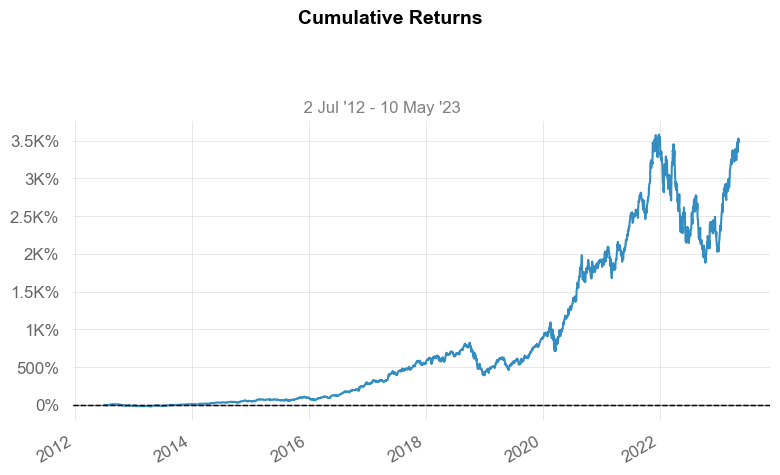

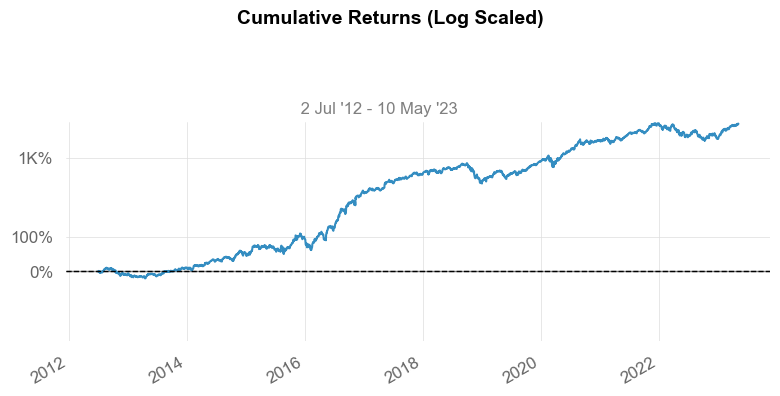

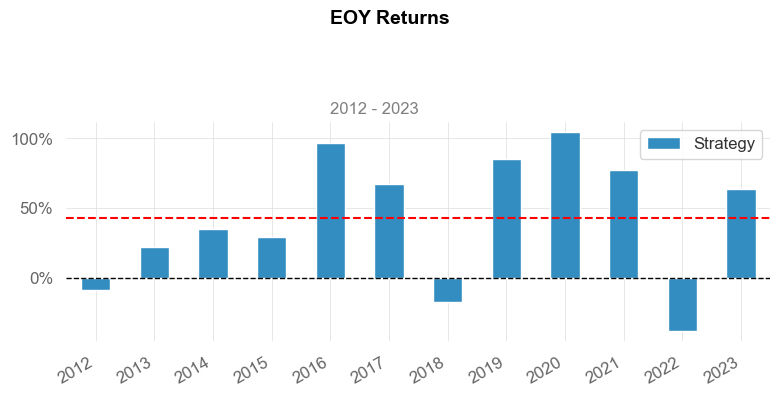

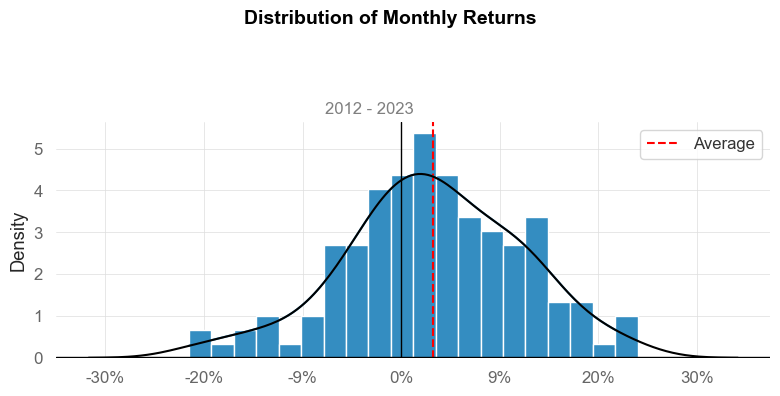

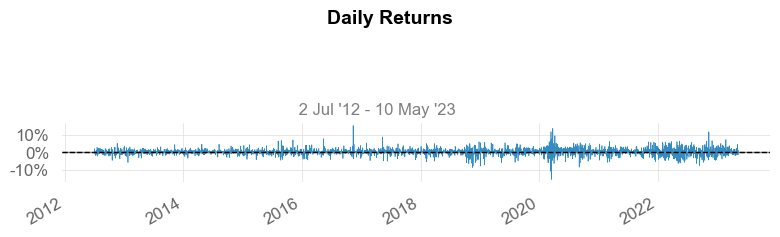

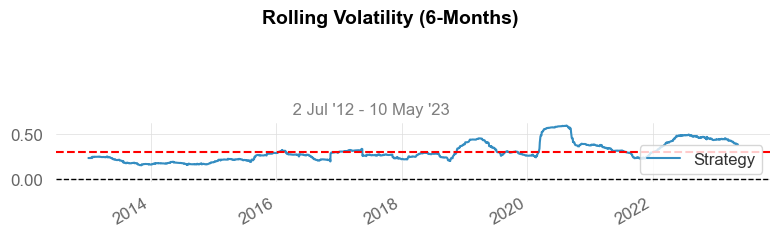

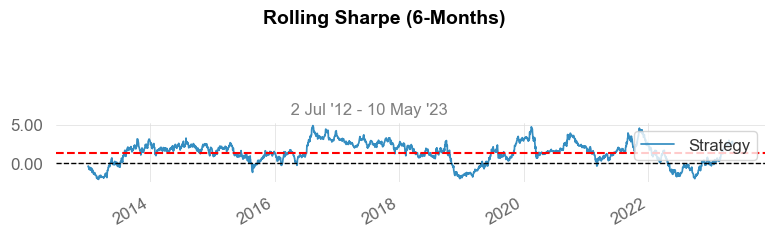

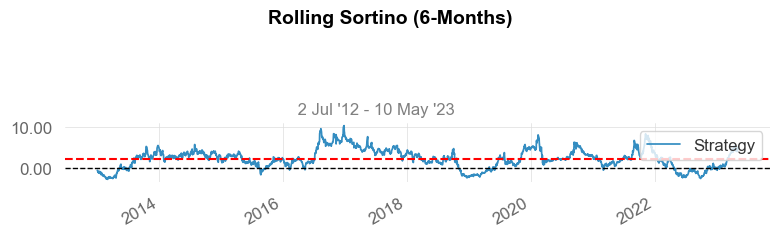

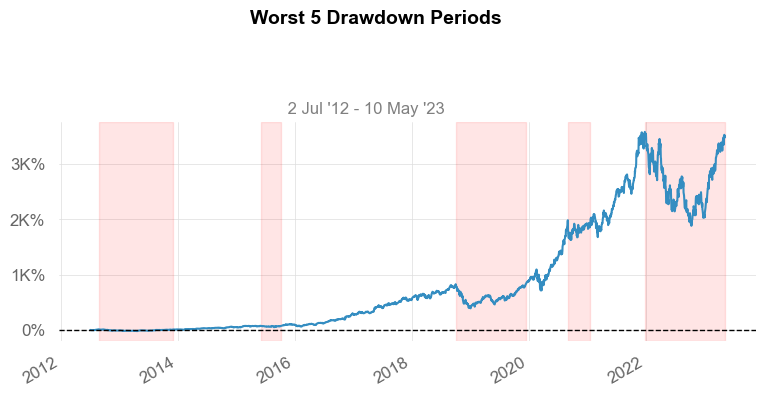

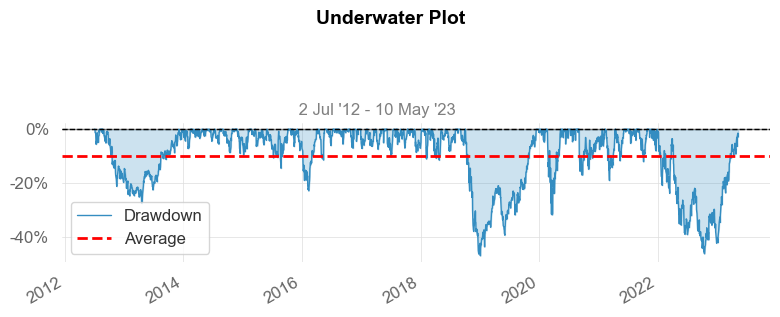

/Users/pedrio/anaconda3/lib/python3.10/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


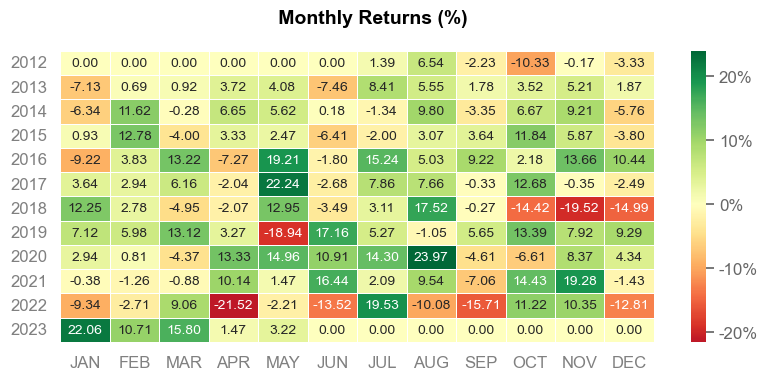

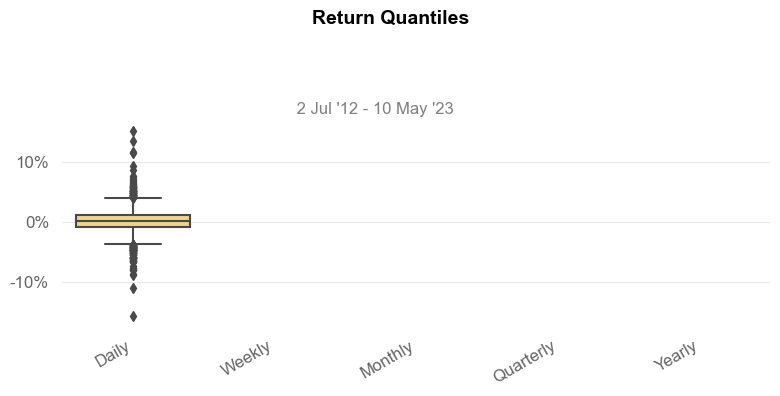

In [16]:
# Displaying new reports comparing the optimized portfolio to your portfolio
# Input your portfolio
print("Start date of stock market: 2012-07-01")
n=int(input("How many comapanies do you have in your portfolio?:"))
date=str(input("Start date of analysis (yyyy-mm-dd):"))
print("Start date of stock market: 2012-07-01")
symbol=[]
weights=[]
portfolio=x*0
for i in range(n):
    x = input("Company #"+str(i+1)+' symbol:')
    y = input("Weight respect the total portfolio amount invested (%):")
    x = qs.utils.download_returns(x)
    x = x.loc[date:'2023-05-10']
    x.index = x.index.tz_convert(None)
    symbol.append(x)
    weights.append(y)
    portfolio=portfolio + x*float(y)


portfolio # Displaying portfolio's daily returns
qs.reports.full(portfolio)